#### Copyright © 2023 Taeyoung Kim and Mingi Kang. All rights reserved. ####

This is the solution for the homework assignment of the Machine Learning and Optimization lecture for WS2023.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [2]:
# make a function to handle vertical decision boundry
def plot_svc_decision_boundary(clf, xmin, xmax):
    w = clf.coef_[0]
    b = clf.intercept_[0]

    if w[1] == 0:  # vertical line
        x0 = -b / w[0]
        plt.axvline(x=x0, color='black', linestyle='-', label='H')
    else:  # non vertical line
        x0 = np.linspace(xmin, xmax, 200)
        decision_boundary = -w[0]/w[1] * x0 - b/w[1]
        margin = 1/w[1]
        gutter_up = decision_boundary + margin
        gutter_down = decision_boundary - margin
        plt.plot(x0, decision_boundary, "k-", linewidth=2, label='H')
        plt.plot(x0, gutter_up, "k--", linewidth=2)
        plt.plot(x0, gutter_down, "k--", linewidth=2)

    # Support vectors
    svs = clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='none', edgecolors='k')

In [3]:
# define function to plot points
def plot_data_points(X, y):
    plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', color='black', label='Class O', s=100)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x', color='black', label='Class X', s=100)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)

In [4]:
# orig. dataset
X = np.array([[-1, 0], [-1, 1], [1, 0]])
y = np.array([-1, -1, 1])  # 'o' == -1, 'x' == 1

In [5]:
# Create model
clf = svm.SVC(kernel='linear', C=1e10)
clf.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

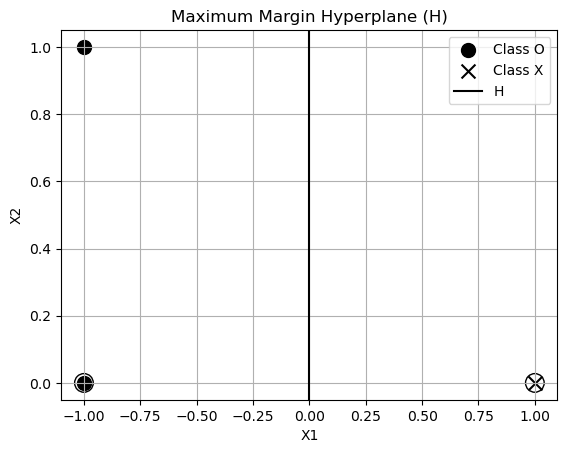

In [6]:
# Plot org.
plt.figure()
plot_data_points(X, y)
plot_svc_decision_boundary(clf, -3, 3)
plt.title('Maximum Margin Hyperplane (H)')
plt.legend()
plt.show()

In [7]:
# new point [2, 0]
new_point = np.array([[2, 0]])
X_new = np.vstack([X, new_point])
y_new = np.array([-1, -1, 1, 1]) 

In [8]:
# Create model with new 
clf_new = svm.SVC(kernel='linear', C=1e10)
clf_new.fit(X_new, y_new)

SVC(C=10000000000.0, kernel='linear')

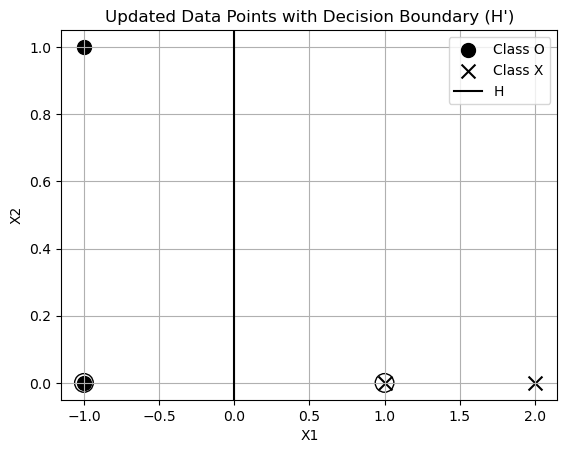

In [9]:
# plot updated
plt.figure()
plot_data_points(X_new, y_new)
plot_svc_decision_boundary(clf_new, -3, 3)
plt.title('Updated Data Points with Decision Boundary (H\')')
plt.legend()
plt.show()